# Advanced data analysis and machine learning

Project work by Radomír Bábek, Jakub Ryšánek and Vojtěch Vondráček


## Task 1: Understaning the data



In [ ]:
from posixpath import sep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

Loading the train_FD001 dataset into Pandas DataFrame

In [ ]:
# Read data from the first part
names = [
    "unit number",
	"time, in cycles",
	"operational setting 1",
	"operational setting 2",
	"operational setting 3"
    ]

sen_measurements = [f"sensor measurement {i}" for i in range(1, 22)]

names = names + sen_measurements

def load_data(file_name):
	return pd.read_csv(file_name, sep=r'\s+', names=names)


data = load_data('./NASA-Turbofan-data/data/train_FD001.txt')
data.info()

display(data)

# Get count, Nan count
string_stats = data.describe()
nan_count = data.isna().sum()
string_stats.loc['NaN count'] = nan_count
display(string_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit number            20631 non-null  int64  
 1   time, in cycles        20631 non-null  int64  
 2   operational setting 1  20631 non-null  float64
 3   operational setting 2  20631 non-null  float64
 4   operational setting 3  20631 non-null  float64
 5   sensor measurement 1   20631 non-null  float64
 6   sensor measurement 2   20631 non-null  float64
 7   sensor measurement 3   20631 non-null  float64
 8   sensor measurement 4   20631 non-null  float64
 9   sensor measurement 5   20631 non-null  float64
 10  sensor measurement 6   20631 non-null  float64
 11  sensor measurement 7   20631 non-null  float64
 12  sensor measurement 8   20631 non-null  float64
 13  sensor measurement 9   20631 non-null  float64
 14  sensor measurement 10  20631 non-null  float64
 15  se

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400
NaN count,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
# Split into a dictionary of DataFrames, keyed by unit number
units = dict(tuple(data.groupby("unit number")))

# Example: get the DataFrame for unit 1
unit1 = units[1]
display(unit1)

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


### Data Visualization

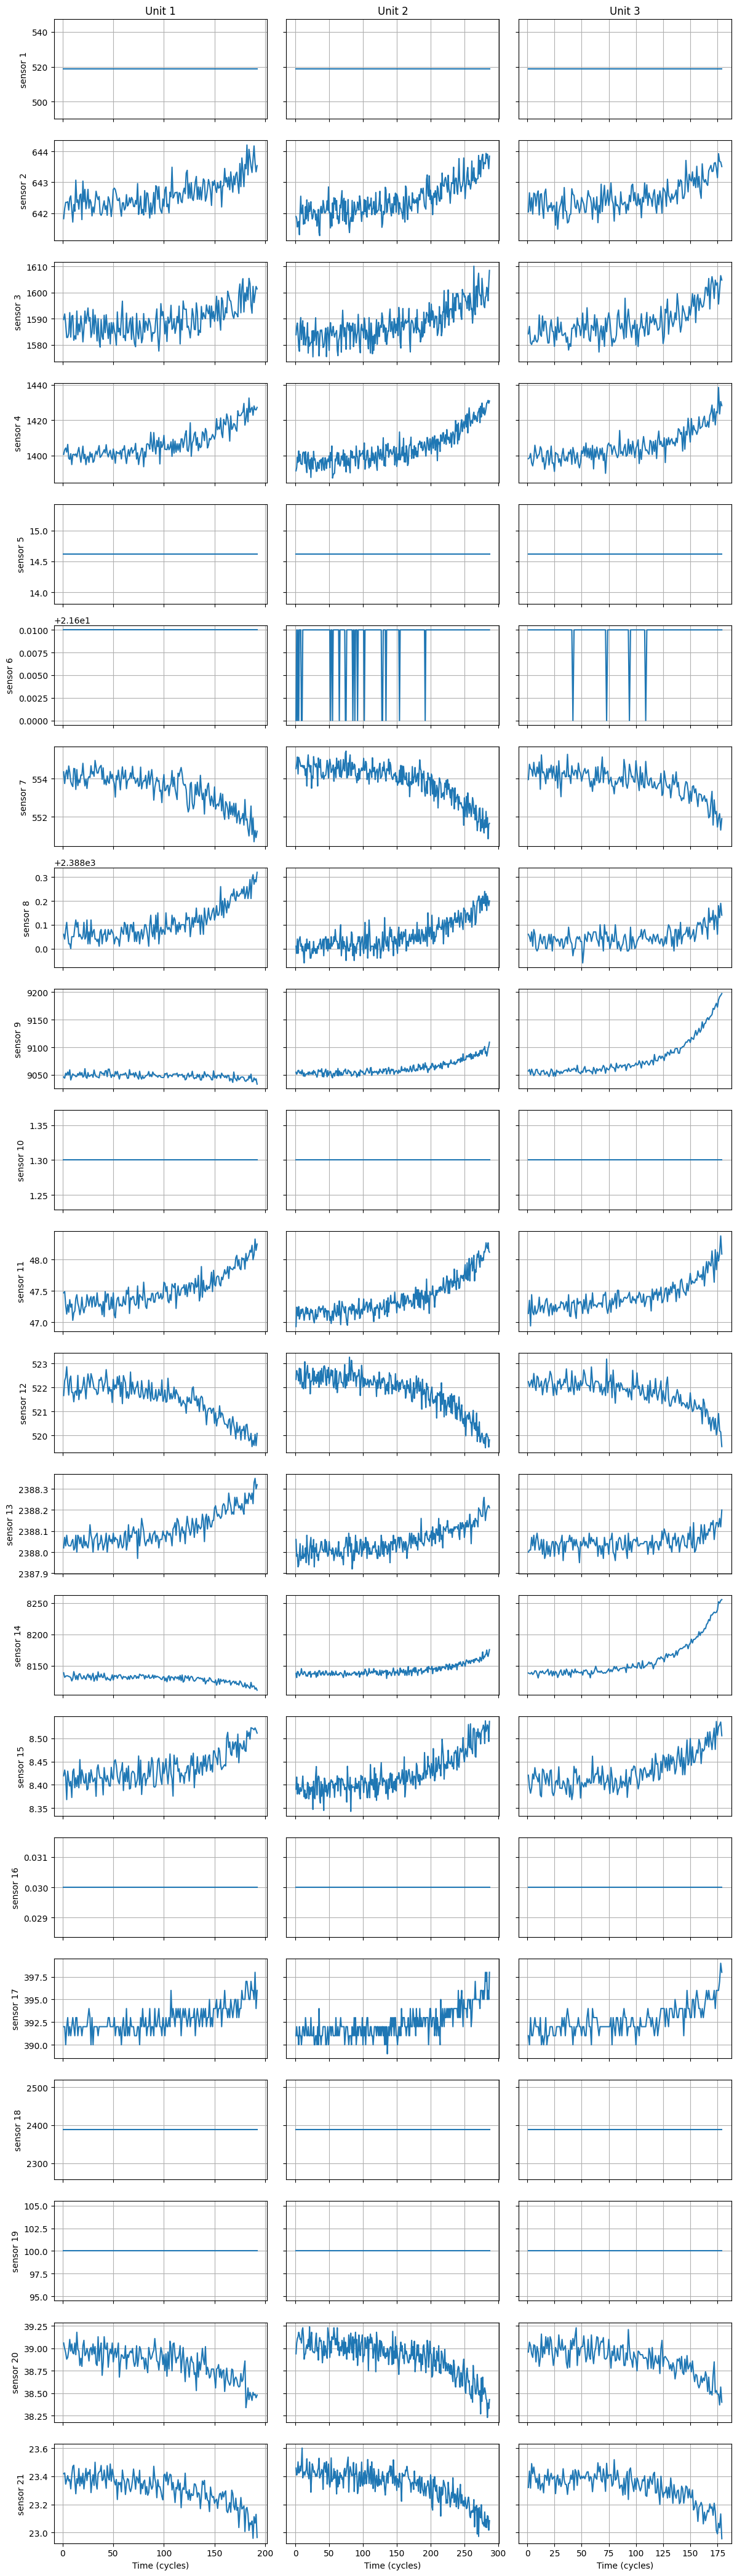

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  # needed for np.newaxis

def plot_units(units, indices):
    # Assume all units have the same sensor columns
    sensor_cols = [col for col in units[indices[0]].columns if "sensor measurement" in col]

    fig, axes = plt.subplots(
        nrows=len(sensor_cols),
        ncols=len(indices),
        figsize=(len(indices)*4, len(sensor_cols)*2),
        sharex='col', sharey='row'
    )

    # Handle case when there's only 1 row or col (matplotlib returns 1D array)
    if len(sensor_cols) == 1:
        axes = axes[np.newaxis, :]
    if len(indices) == 1:
        axes = axes[:, np.newaxis]

    for j, idx in enumerate(indices):
        unit = units[idx]
        for i, col in enumerate(sensor_cols):
            ax = axes[i, j]
            ax.plot(unit["time, in cycles"], unit[col])
            if j == 0:
                ax.set_ylabel(f"sensor {i+1}")
            if i == len(sensor_cols) - 1:
                ax.set_xlabel("Time (cycles)")
            if i == 0:  # Top row → add column title
                ax.set_title(f"Unit {idx}")
            ax.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_units(units, [1, 2, 3])


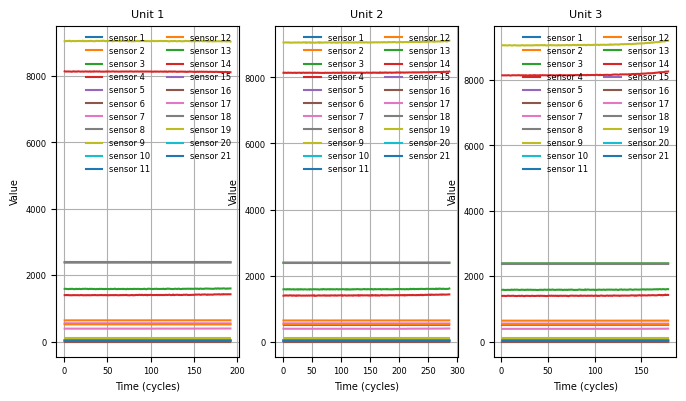

In [ ]:
def plot_units_big(unit, ax, title=None):
    # Select only the sensor columns
    sensor_cols = [col for col in unit.columns if "sensor measurement" in col]

    for i, col in enumerate(sensor_cols):
        ax.plot(unit["time, in cycles"], unit[col], label=f"sensor {i+1}")

    if title:
        ax.set_title(title, fontsize=8, pad=6)  # small title, controlled padding
    ax.set_xlabel("Time (cycles)", fontsize=7, labelpad=4)
    ax.set_ylabel("Value", fontsize=7, labelpad=4)
    ax.tick_params(axis='both', labelsize=6)   # small tick labels
    ax.grid(True)
    ax.legend(fontsize=6, frameon=False, loc="upper right", ncol=2)


# --- Plot 3 units next to each other ---
fig, axes = plt.subplots(1, 3, figsize=(8, 4.3))  # A4 landscape in inches

for i, ax in enumerate(axes):
    unit_n = i+1
    plot_units_big(units[unit_n], ax=ax, title=f"Unit {unit_n}")

Zero variance columns (constant values): [18, 19]


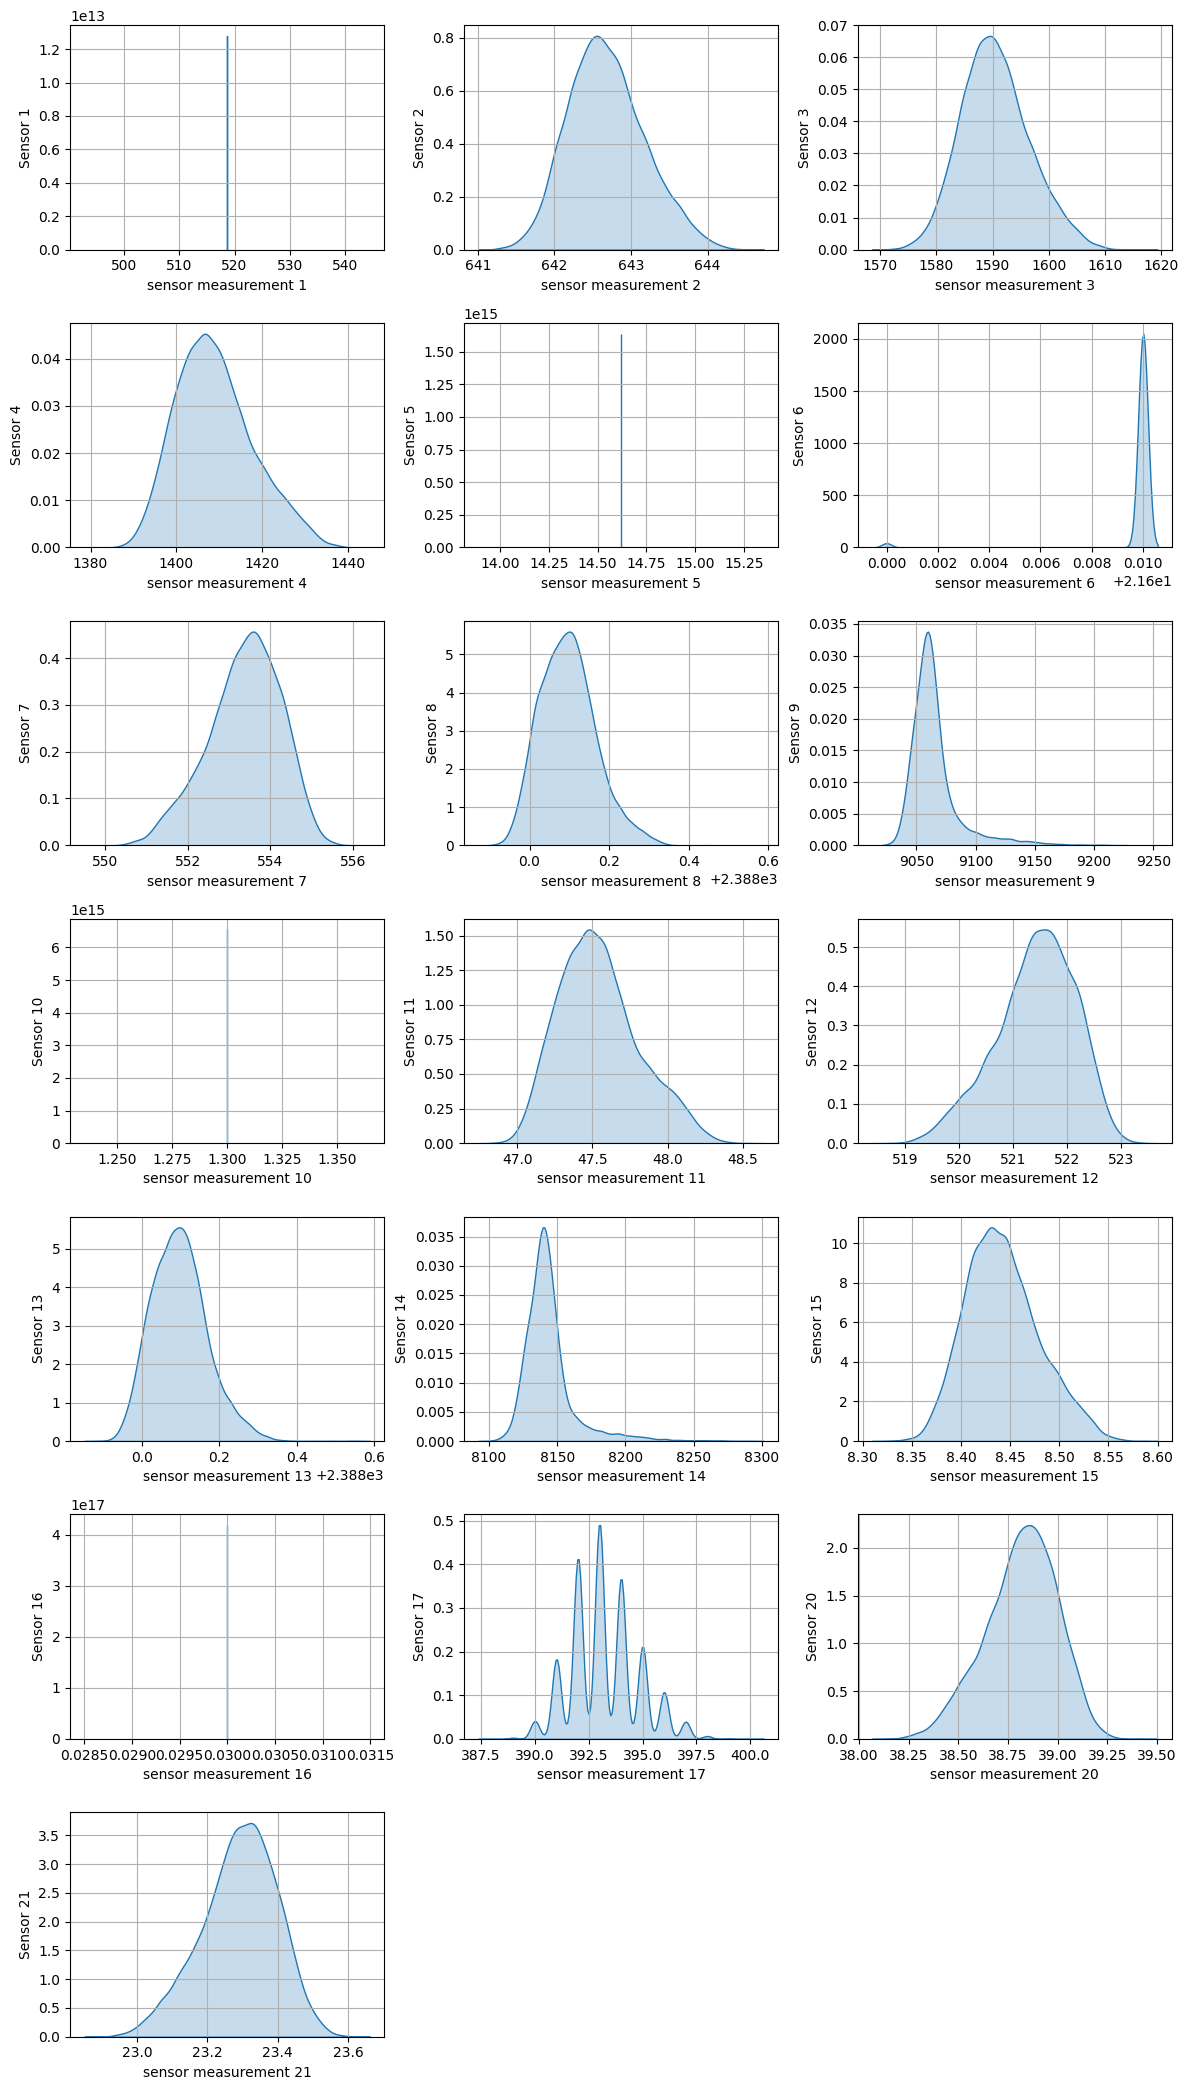

In [ ]:
import math
# Select only sensor columns
sensor_cols = [col for col in data.columns if "sensor measurement" in col]

# # Keep only sensors with non-zero variance and with their orig index
valid_cols = []
filtered_cols = []
for i, col in enumerate(sensor_cols):
    if data[col].var() > 0:
        valid_cols.append((i, col))
    else:
        filtered_cols.append(i+1)

print("Zero variance columns (constant values):", filtered_cols)

n = len(valid_cols)
cols = 3
rows = math.ceil(n / cols) if n > 0 else 1

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=False, sharey=False)

# Ensure 2D array of axes and flatten for easy iteration
axes = np.atleast_2d(axes)
axes_flat = axes.ravel()

# Plot density only for valid sensors
for ax, (i, col) in zip(axes_flat, valid_cols):
    sns.kdeplot(data[col], ax=ax, fill=True)
    ax.set_ylabel(f"Sensor {i+1}")
    ax.grid(True)

# Hide any unused subplots
for ax in axes_flat[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()




       unit number  time, in cycles  operational setting 1  \
0                1                1                -0.0007   
1                1                2                 0.0019   
2                1                3                -0.0043   
3                1                4                 0.0007   
4                1                5                -0.0019   
...            ...              ...                    ...   
20626          100              196                -0.0004   
20627          100              197                -0.0016   
20628          100              198                 0.0004   
20629          100              199                -0.0011   
20630          100              200                -0.0032   

       operational setting 2  operational setting 3  sensor measurement 1  \
0                    -0.0004                  100.0                   0.0   
1                    -0.0003                  100.0                   0.0   
2                     0.

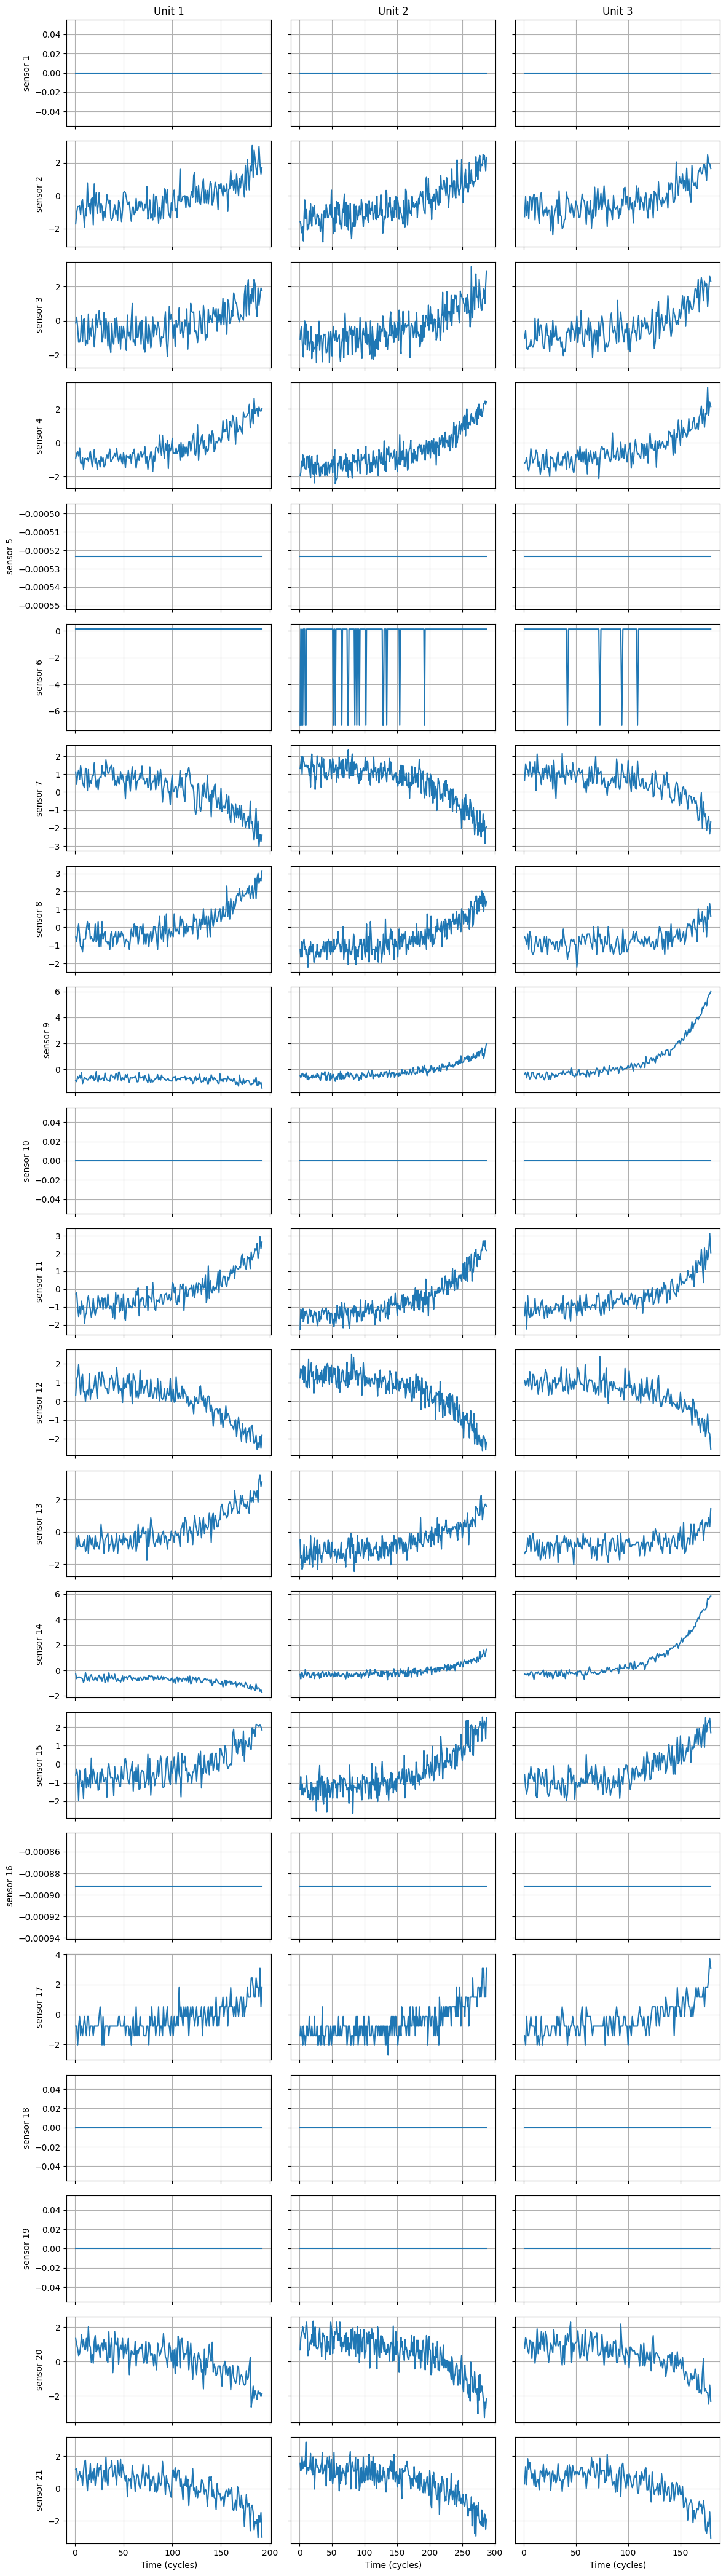

In [ ]:
# Normalize columns
def normalize_sensor_columns(df):
    df = df.copy()

    sensor_cols = [c for c in df.columns if "sensor measurement" in c]

    mu = df[sensor_cols].mean(axis=0)
    sd = df[sensor_cols].std(axis=0, ddof=0)

    sd_r = sd.replace(0, 1)  # prevence dělení nulou
    df[sensor_cols] = (df[sensor_cols] - mu) / sd_r

    return df, mu, sd

normalized_data, mu_train, sd_train = normalize_sensor_columns(data)

print(normalized_data)

units = {u: g for u, g in normalized_data.groupby("unit number")}

plot_units(units, [1, 2, 3])

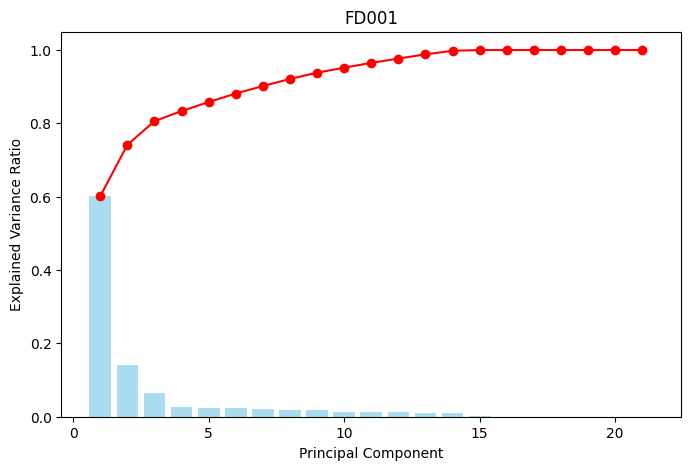

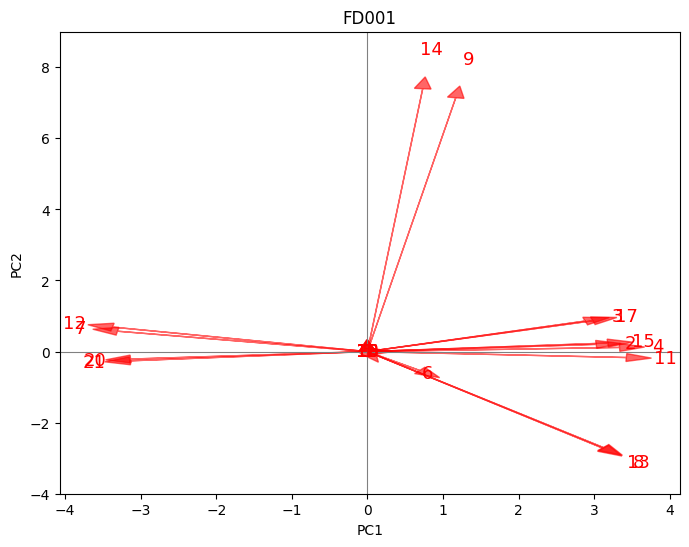

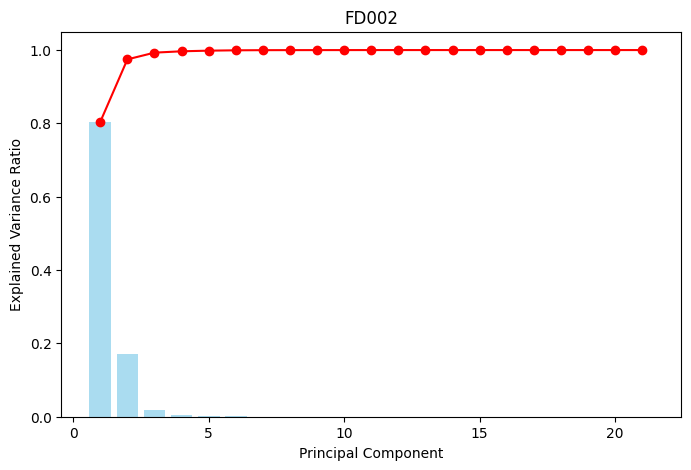

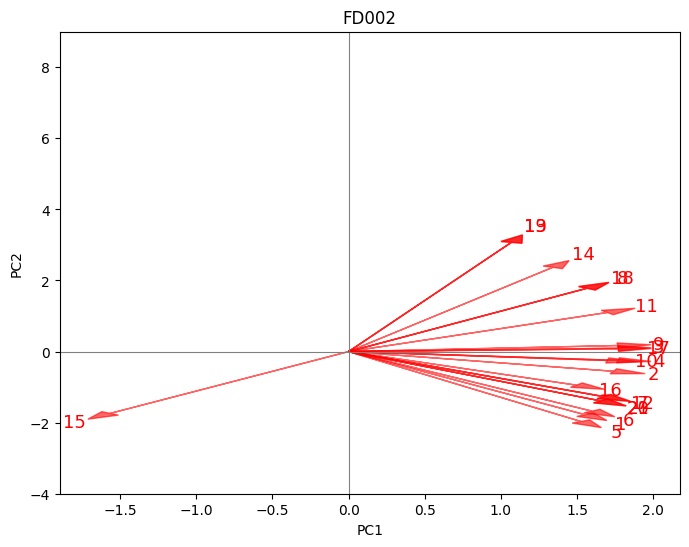

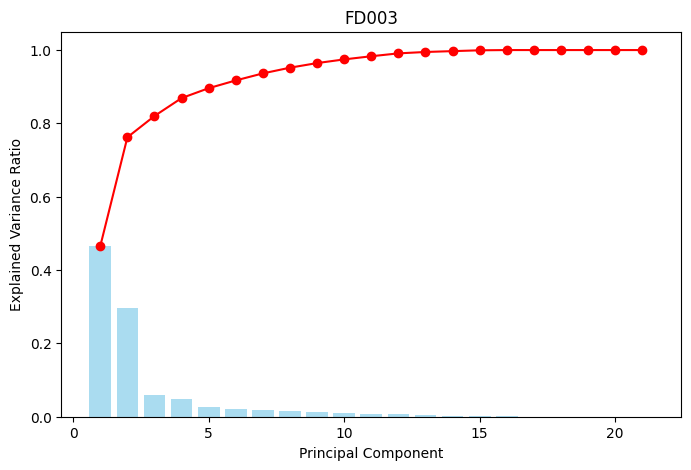

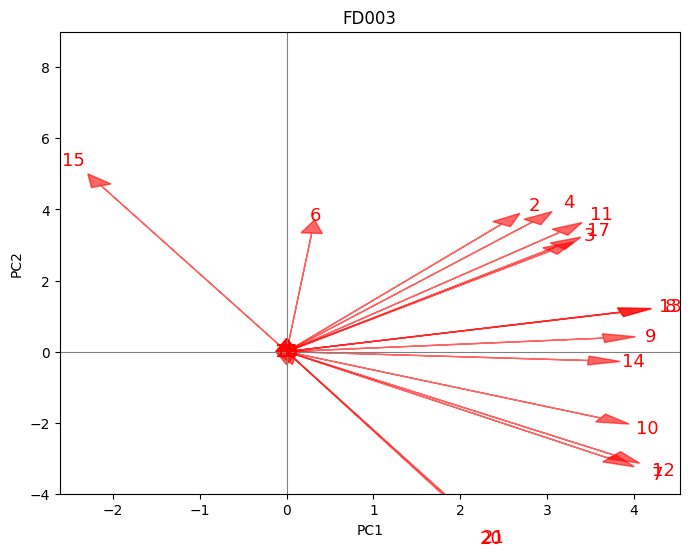

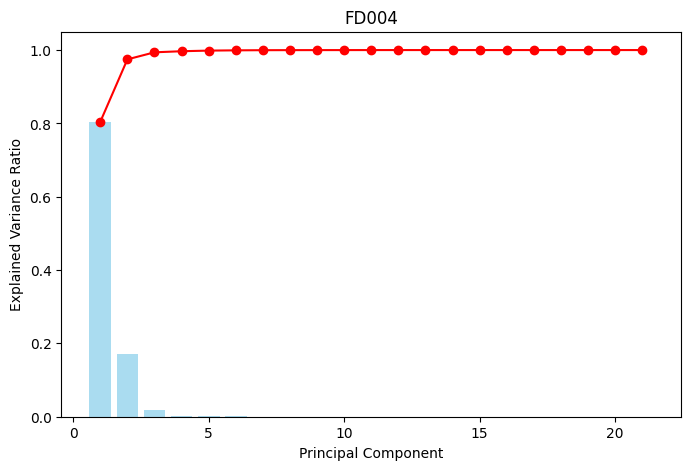

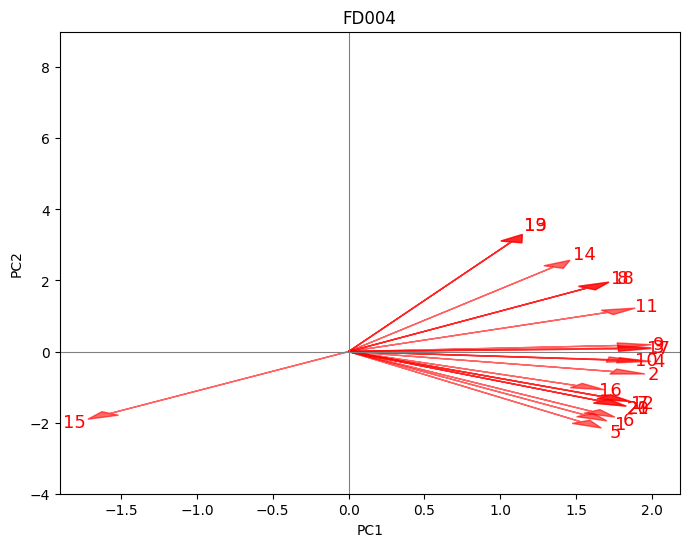

In [ ]:
from sklearn.decomposition import PCA

def load_normalized_data(file_name):
    # normalize_sensor_columns returns (df, mu, sd) — we only need the DataFrame here
    df, _, _ = normalize_sensor_columns(load_data(file_name))
    return df

fd1 = normalized_data
fd2 = load_normalized_data('./NASA-Turbofan-data/data/train_FD002.txt')
fd3 = load_normalized_data('./NASA-Turbofan-data/data/train_FD003.txt')
fd4 = load_normalized_data('./NASA-Turbofan-data/data/train_FD004.txt')


def plot_PCA(normalized_data, title):
    # PCA
    sensor_cols = [c for c in normalized_data.columns if "sensor measurement" in c]
    X_norm = normalized_data[sensor_cols].to_numpy()

    pca = PCA()
    scores = pca.fit_transform(X_norm)
    coeff = pca.components_.T

    explained_variance = pca.explained_variance_ratio_

    plt.figure(figsize=(8,5))
    plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue')
    plt.plot(range(1, len(explained_variance)+1), np.cumsum(explained_variance), marker='o', color='red')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(title)
    plt.show()

    # Biplot (PC1 vs PC2)
    plt.figure(figsize=(8,6))

    scale = max(scores[:,0].max(), scores[:,1].max())

    for i in range(len(sensor_cols)):
        plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale, color='r', alpha=0.6, head_width=0.02*scale)
        plt.text(coeff[i,0]*scale*1.15, coeff[i,1]*scale*1.15, str(i+1), color='r', ha='center', va='center', fontsize=13)

    plt.xlabel(f"PC1")
    plt.ylabel(f"PC2")
    plt.title(title)
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.ylim((-4, 9))
    plt.show()


plot_PCA(fd1, "FD001")
plot_PCA(fd2, "FD002")
plot_PCA(fd3, "FD003")
plot_PCA(fd4, "FD004")


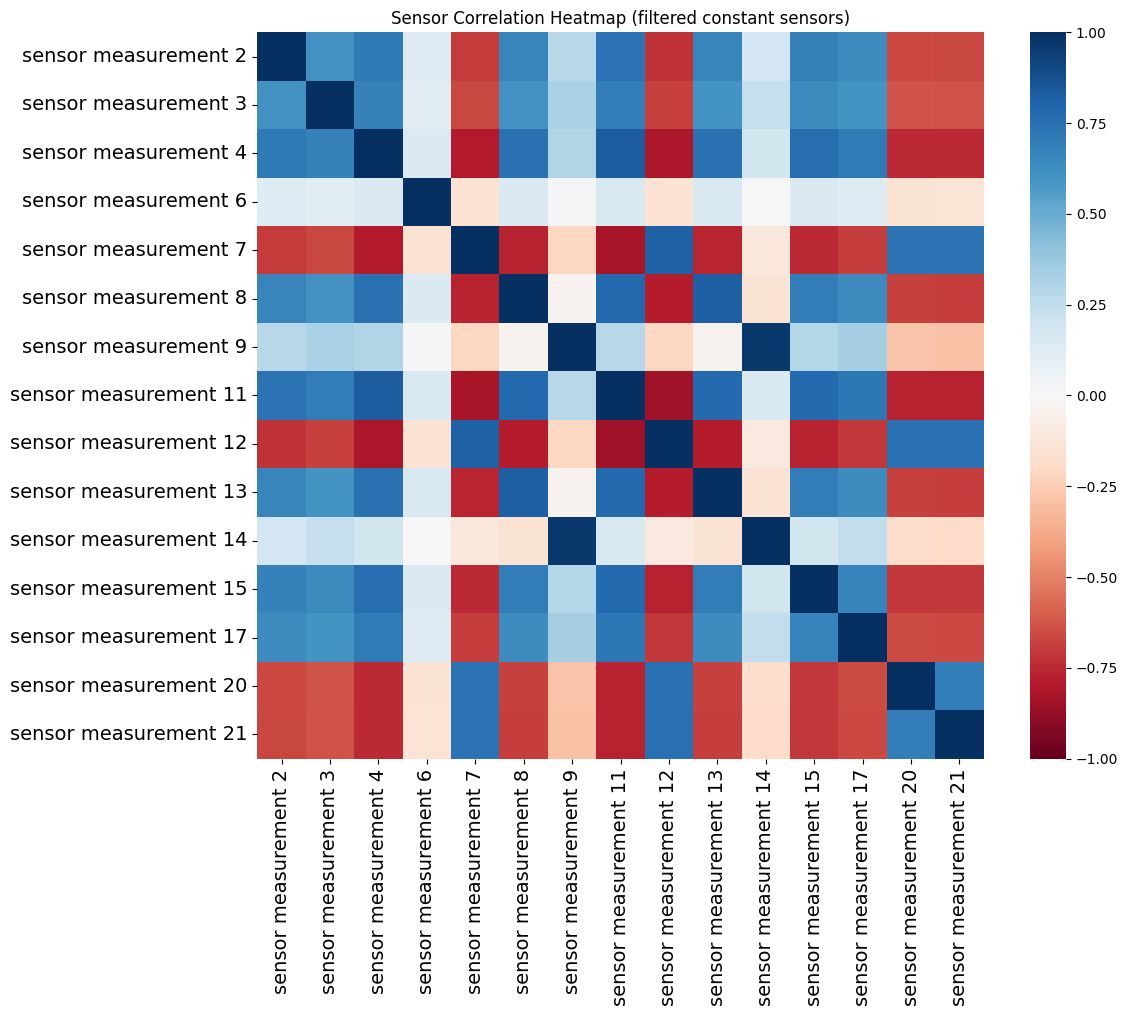

In [ ]:
import seaborn as sns

X_norm = normalized_data[sensor_cols].to_numpy()

# Identify near-constant sensors
stdDev = X_norm.std(axis=0)
threshold = 1e-6
keepCols = stdDev > threshold

X_normFiltered = X_norm[:, keepCols]
sensorNamesFiltered = np.array(sensor_cols)[keepCols]

# Compute correlation matrix
corrMatrix = np.corrcoef(X_normFiltered, rowvar=False)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, xticklabels=sensorNamesFiltered, yticklabels=sensorNamesFiltered,
            cmap="RdBu", vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Sensor Correlation Heatmap (filtered constant sensors)")
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

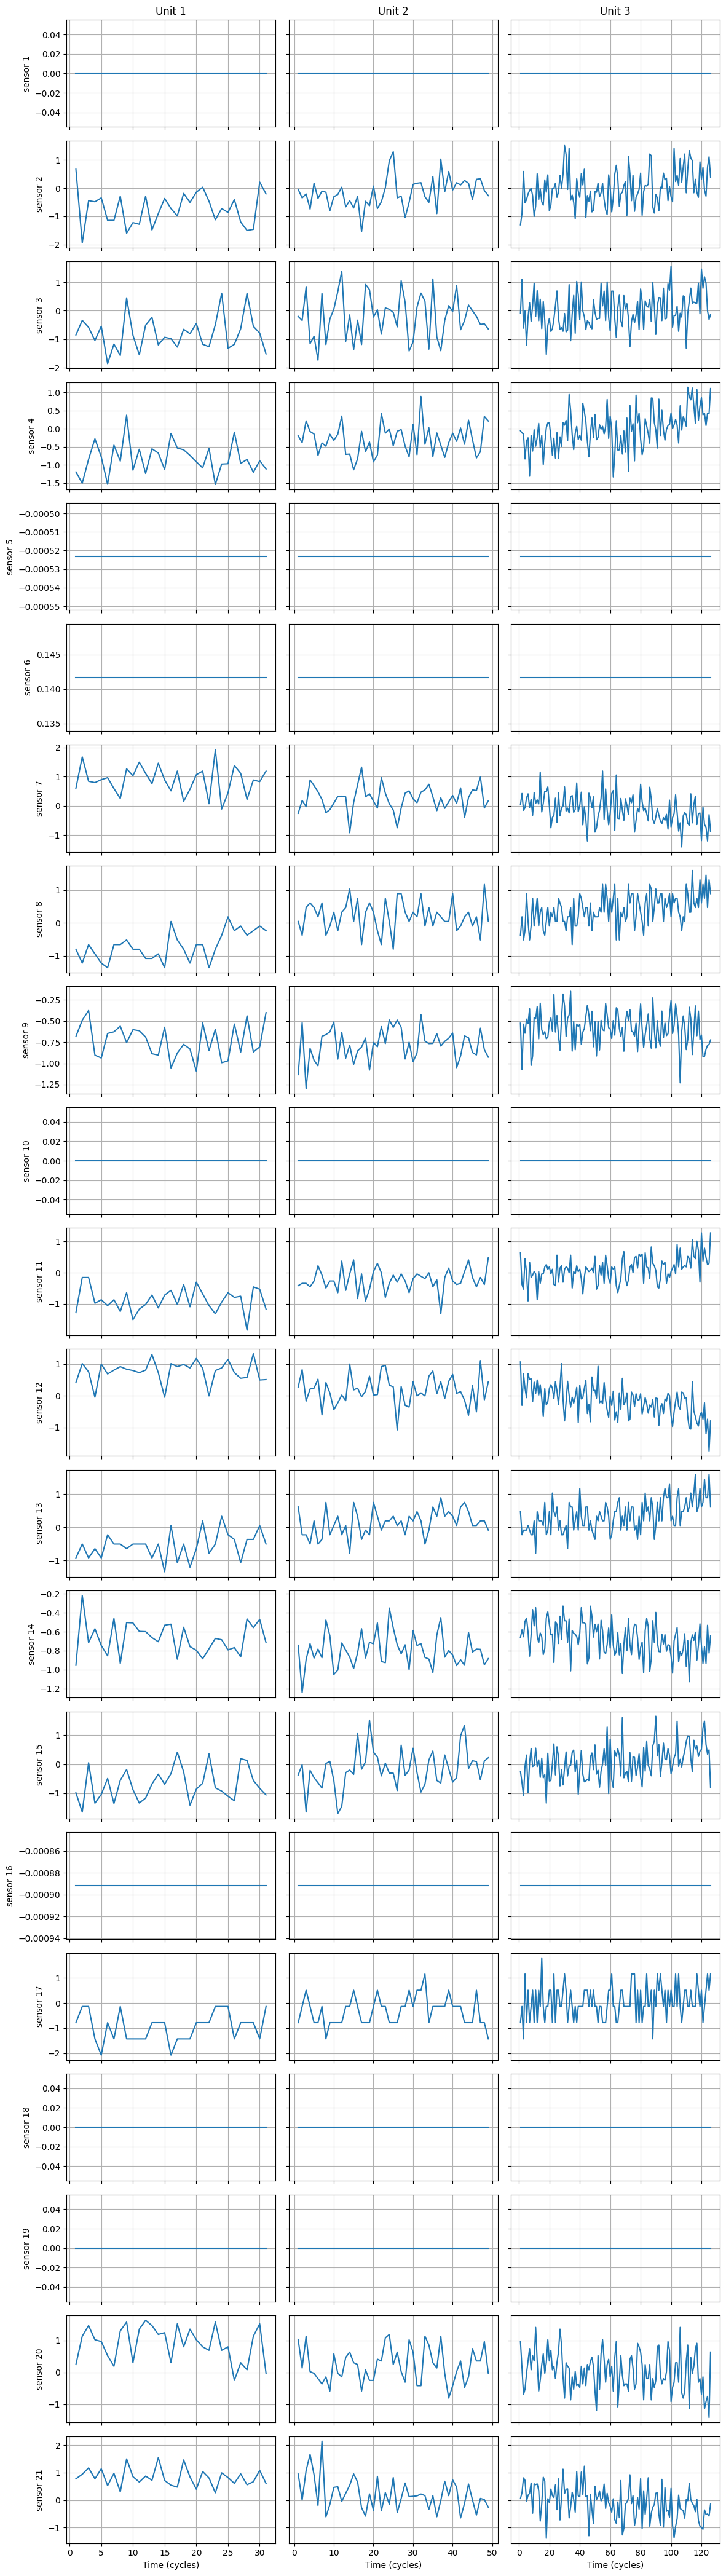

In [ ]:
def normalize_test_dataset(mu_train, sd_train, test_data):
    test_data = test_data.copy()
    sensor_cols = [c for c in test_data.columns if "sensor measurement" in c]

    sd_train = sd_train.replace(0, 1)

    test_data[sensor_cols] = (test_data[sensor_cols] - mu_train) / sd_train

    return test_data

# Load first test dataset
test_data = load_data('./NASA-Turbofan-data/data/test_FD001.txt')

# normalize
normalized_test_data = normalize_test_dataset(mu_train, sd_train, test_data)

units = {u: g for u, g in normalized_test_data.groupby("unit number")}

plot_units(units, [1, 2, 3])

In [ ]:
from posixpath import sep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import math

# Data loading

In [ ]:
def filter_no_variance(data):
    # Select only sensor columns
    sensor_cols = [col for col in data.columns if "sensor measurement" in col]

    # # Keep only sensors with non-zero variance and with their orig index
    valid_cols = []
    filtered_cols = []
    for i, col in enumerate(sensor_cols):
        if data[col].var() > 0:
            valid_cols.append((i, col))
        else:
            filtered_cols.append(col)

    print("Zero variance columns (constant values):", filtered_cols)

    data = data.drop(columns=filtered_cols)
    return data, filtered_cols

def standardize(data):
  return data

def sample(data):
  return data

def from_file(train_file_name, validation_partition = 0.2, dropped_cols = None):
    names = [
      "unit number",
      "time, in cycles",
      "operational setting 1",
      "operational setting 2",
      "operational setting 3"
        ]

    sen_measurements = [f"sensor measurement {i}" for i in range(1, 22)]
    names = names + sen_measurements
    data = pd.read_csv(train_file_name, sep=r'\s+', names=names)

    return data


def train_from_file(file_name, validation_partition = 0.2):
    data = from_file(file_name)

    data, filtered_cols = filter_no_variance(data)

    #COUNTING RUL
    units = dict(tuple(data.groupby("unit number")))
    new_units = []
    for u_id in units:
        u = units[u_id]
        u = u.drop(columns=["unit number",
                        "operational setting 1",
                        "operational setting 2",
                        "operational setting 3"])

        failure_time = u.shape[0] + 1
        u["RUL"] = failure_time - u["time, in cycles"]
        new_units.append(u)

    units = new_units

    # SPLITTING VALIDATION / TRAIN
    validation_unit_count = math.ceil(len(units) * validation_partition)
    np.random.seed(42)
    np.random.shuffle(units)

    validation_units = units[:validation_unit_count]
    train_units = units[validation_unit_count:]

    validation_data = pd.concat(validation_units)
    train_data = pd.concat(train_units)

    return train_data, validation_data, filtered_cols

def test_from_file(data_file_name, gt_file_name, dropped_cols):
    data = from_file(data_file_name)
    data = data.drop(columns=dropped_cols)

    #read file, where there is only one number on a line into a vector of these numbers
    gt = np.loadtxt(gt_file_name)

    #COUNTING RUL
    units = dict(tuple(data.groupby("unit number")))
    new_units = []
    i = 0
    for u_id in units:
        u = units[u_id]
        u = u.drop(columns=["unit number",
                        "operational setting 1",
                        "operational setting 2",
                        "operational setting 3"])
        RUL = gt[i]
        u["RUL"] = int(RUL + u.shape[0] + 1) - u["time, in cycles"]
        i += 1
        new_units.append(u)

    units = new_units

    test_data = pd.concat(units)
    return test_data


train_data, validation_data, dropped_cols = train_from_file("./NASA-Turbofan-data/data/train_FD001.txt")
test_data = test_from_file("./NASA-Turbofan-data/data/test_FD001.txt", "./NASA-Turbofan-data/data/RUL_FD001.txt", dropped_cols=dropped_cols)

Zero variance columns (constant values): ['sensor measurement 18', 'sensor measurement 19']


# Data standardization

In [ ]:
def normalize_data(train_data, validation_data, test_data):
    sensor_cols = [c for c in train_data.columns if "sensor measurement" in c]

    mu_train = train_data[sensor_cols].mean(axis=0)
    sd_train = train_data[sensor_cols].std(axis=0, ddof=0)

    sd_r = sd_train.replace(0, 1)  # prevence dělení nulou

    train_data[sensor_cols]      = (train_data[sensor_cols     ] - mu_train) / sd_r
    validation_data[sensor_cols] = (validation_data[sensor_cols] - mu_train) / sd_r
    test_data[sensor_cols]       = (test_data[sensor_cols      ] - mu_train) / sd_r

    return train_data, validation_data, test_data

# normalize
train_data, validation_data, test_data = normalize_data(train_data, validation_data, test_data)

display(train_data)
display(validation_data)
display(test_data)


,"time, in cycles",sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,...,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
10980,1,0.0,-0.216029,0.175984,-0.325598,-0.001151,0.13902,-0.037656,0.336065,-0.423193,...,-0.600887,0.697886,0.057683,-0.513529,0.063313,-0.001094,-1.426246,-0.377652,0.250680,275
10981,2,0.0,0.145338,-0.665398,0.731807,-0.001151,0.13902,-0.789582,0.052959,-0.277998,...,0.678629,-0.322567,0.476055,-0.356788,-0.022005,-0.001094,1.160624,-0.044072,-0.478357,274
10982,3,0.0,-0.416788,-0.908610,0.215374,-0.001151,0.13902,-0.538940,0.336065,-0.326985,...,-0.450356,-0.812384,-0.221232,-0.551310,0.108637,-0.001094,0.513906,0.011525,0.405240,273
10983,4,0.0,-0.316408,-0.468199,-0.577680,-0.001151,0.13902,0.167415,0.477618,-0.462912,...,-0.224559,0.384947,0.336598,-0.359851,-0.168644,-0.001094,0.513906,0.400701,-0.056577,272
10984,5,0.0,-0.336484,-0.441906,0.255529,-0.001151,0.13902,0.258557,0.477618,-0.887024,...,-0.186926,0.874764,1.173342,-0.580922,-0.024671,-0.001094,0.513906,-0.155265,0.278613,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,209,0.0,1.871867,2.236713,2.345799,-0.001151,0.13902,-2.418756,1.468488,1.841238,...,2.485006,-2.363472,1.870629,1.680330,2.884122,-0.001094,3.100776,-2.045551,-2.812578,5
10331,210,0.0,1.550652,2.502932,2.122718,-0.001151,0.13902,-2.418756,2.317806,1.797988,...,1.920513,-2.104957,1.452257,1.831455,2.126929,-0.001094,3.747493,-2.712710,-2.312587,4
10332,211,0.0,1.390045,2.601531,2.669267,-0.001151,0.13902,-2.247864,1.751594,1.931709,...,2.372107,-2.594775,1.591714,1.682883,2.228243,-0.001094,1.807341,-2.156744,-2.596567,3
10333,212,0.0,3.237029,1.935985,1.365358,-0.001151,0.13902,-2.430149,1.468488,2.218569,...,2.485006,-2.036927,1.452257,1.734449,1.263090,-0.001094,1.807341,-2.267937,-1.517444,2


,"time, in cycles",sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,...,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
16885,1,0.0,1.068830,-1.349021,0.242144,-0.001151,0.13902,-1.176938,0.477618,-0.804938,...,0.603364,0.439371,1.033885,-0.901041,-0.109989,-0.001094,-0.132811,-0.711231,-0.519324,267
16886,2,0.0,0.707464,-0.032718,-0.422638,-0.001151,0.13902,-0.675654,0.194512,-0.703875,...,0.189403,0.003978,1.591714,-0.689160,-0.173977,-0.001094,-1.426246,0.233911,0.145468,266
16887,3,0.0,-0.316408,0.595032,-0.344560,-0.001151,0.13902,-0.265512,0.052959,-0.678278,...,0.076504,0.316917,0.476055,-0.964860,-0.131318,-0.001094,-0.132811,-0.210862,-0.450424,265
16888,4,0.0,0.265793,-1.094306,0.235451,-0.001151,0.13902,-0.527547,0.902277,-0.807145,...,0.001238,-0.540263,0.754970,-0.956691,-0.408600,-0.001094,-0.779529,-0.099668,-0.193446,264
16889,5,0.0,0.747615,-0.011355,0.026870,-0.001151,0.13902,-0.356655,-0.088593,-1.089150,...,-0.299824,-0.431415,0.615512,-0.539567,-0.771199,-0.001094,1.160624,0.345105,0.152917,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,187,0.0,1.972246,1.189915,2.573342,-0.001151,0.13902,-2.259257,1.610041,1.030526,...,1.807615,-1.533504,1.591714,0.477971,2.086936,-0.001094,1.160624,-1.656374,-2.222272,5
6408,188,0.0,1.008602,2.174267,2.725038,-0.001151,0.13902,-2.395971,1.751594,0.905632,...,2.108677,-2.309048,1.591714,0.662792,2.281567,-0.001094,1.807341,-1.322794,-2.042573,4
6409,189,0.0,1.630956,1.998431,2.291145,-0.001151,0.13902,-1.883294,1.043830,0.964769,...,2.597904,-1.887261,1.452257,0.539238,1.937631,-0.001094,2.454058,-1.934357,-1.237188,3
6410,190,0.0,2.413917,2.892400,2.389300,-0.001151,0.13902,-2.020008,2.459359,1.307236,...,2.259209,-2.309048,1.591714,0.735802,2.852128,-0.001094,2.454058,-1.878761,-2.105887,2


,"time, in cycles",sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,sensor measurement 7,sensor measurement 8,sensor measurement 9,...,sensor measurement 11,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 20,sensor measurement 21,RUL
0,1,0.0,0.687388,-0.854380,-1.190038,-0.001151,0.13902,0.600342,-0.796358,-0.672100,...,-1.278278,0.412159,-0.918519,-0.937290,-0.981826,-0.001094,-0.779529,0.233911,0.773017,143
1,2,0.0,-1.942557,-0.335090,-1.501236,-0.001151,0.13902,1.682661,-1.221017,-0.484537,...,-0.149293,1.010825,-0.500147,-0.218938,-1.645703,-0.001094,-0.132811,1.123458,0.941543,142
2,3,0.0,-0.436864,-0.583232,-0.840916,-0.001151,0.13902,0.839592,-0.654805,-0.372441,...,-0.149293,0.752310,-0.918519,-0.704987,0.055314,-0.001094,-0.132811,1.457037,1.174313,141
3,4,0.0,-0.477015,-1.046649,-0.274289,-0.001151,0.13902,0.794020,-0.937911,-0.887465,...,-0.977215,-0.050446,-0.639604,-0.562032,-1.341760,-0.001094,-1.426246,1.012264,0.774879,140
4,5,0.0,-0.336484,-0.542149,-0.776222,-0.001151,0.13902,0.896556,-1.221017,-0.920123,...,-0.864317,0.997219,-0.918519,-0.733578,-1.037816,-0.001094,-2.072963,0.956668,1.140794,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0,1.129058,1.472567,0.770846,-0.001151,0.13902,0.042094,-1.079464,3.396903,...,0.565731,-0.989263,-1.336891,3.541817,0.785845,-0.001094,0.513906,-0.933618,-0.866618,25
13092,195,0.0,1.088906,0.854677,1.469090,-0.001151,0.13902,-0.174370,-0.654805,3.322319,...,0.227035,-0.499445,-0.081775,3.417752,0.244612,-0.001094,1.160624,-1.378391,-0.124546,24
13093,196,0.0,1.530576,0.437273,-0.229673,-0.001151,0.13902,-0.379441,0.194512,3.592850,...,0.114137,-0.322567,-0.779062,3.743998,0.396584,-0.001094,1.160624,-1.100408,-0.794924,23
13094,197,0.0,1.169210,0.739644,1.169046,-0.001151,0.13902,-0.003477,-0.371699,3.682880,...,0.264668,-0.118476,-0.221232,3.909418,0.775180,-0.001094,1.160624,-0.878021,-0.191584,22
